### Required Packages

In [4]:
#!pip install simpletransformers
#!pip install transformers
#!pip install pandas

### Defining punctuation

In [1]:
special_labels = {',': 'I-COMMA',
                  '.': 'I-DOT',
                  '?': 'I-QMARK',
                  '!': 'I-EMARK',
                  ':': 'I-COLON',
                  ';': 'I-SEMICOLON',
                  '-': 'I-HYPHEN', # Label for the hyphen (new)
                  "'": 'I-APOST'  } # Label for the apostrophe (new)
normal_label = 'O'

In [2]:
#Create labels

labels_set = list(special_labels.values()) + [normal_label]

In [3]:
from simpletransformers.ner import NERModel, NERArgs
import pandas as pd

In [4]:
#Model

model_args = NERArgs()
model_args.overwrite_output_dir = True
model_args.save_steps = -1
model = NERModel('bert',
                 'bert-base-uncased',
                 labels = labels_set,
                 args=model_args,
                 use_cuda=False)



Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: 

### Training bins 1 to 9

In [8]:
#binz = 10
#for i in range(binz-1):
#    print(f'\t\t\t\t\t\tBin {i+1} out of {binz}')
#    bin = pd.read_csv(f'./preprocessed_wikitext/train{i}-{binz}.csv').dropna()
#    model.train_model(bin, output_dir=f'./bert_models/{i}')
#    del bin

In [5]:
# Fine tune with nine bins and validate with one bin
# 'processed_tedtalk' derectory with csv files in the same folder

binz = 10
for i in range(binz-1):
    print(f'\t\t\t\t\t\tBin {i+1} out of {binz}')
    bin = pd.read_csv(f'./processed_tedtalk/train{i}-{binz}.csv').dropna()
    model.train_model(bin, output_dir=f'./bert_models/{i}')
    del bin

						Bin 1 out of 10


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/867 [00:00<?, ?it/s]

						Bin 2 out of 10


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/864 [00:00<?, ?it/s]

						Bin 3 out of 10


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/866 [00:00<?, ?it/s]

						Bin 4 out of 10


  0%|          | 0/12 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/869 [00:00<?, ?it/s]

						Bin 5 out of 10


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/868 [00:00<?, ?it/s]

						Bin 6 out of 10


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/865 [00:00<?, ?it/s]

						Bin 7 out of 10


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/866 [00:00<?, ?it/s]

						Bin 8 out of 10


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/865 [00:00<?, ?it/s]

						Bin 9 out of 10


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/866 [00:00<?, ?it/s]

In [6]:
testdf = pd.read_csv('./processed_tedtalk/train9-10.csv').dropna()

In [7]:
result, model_outputs, predictions = model.eval_model(testdf)
groups = [df for _, df in testdf.groupby('sentence_id')]
print(len(predictions) == len(groups))

  0%|          | 0/13 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/868 [00:00<?, ?it/s]

True


In [8]:
trues = []
for i, sentence in enumerate(predictions):
    trues.append(groups[i]['labels'].to_list()[:len(sentence)])

In [9]:
print(len(trues) == len(predictions))

True


In [10]:
import itertools
ps = list(itertools.chain.from_iterable(predictions))
ts = list(itertools.chain.from_iterable(trues))

### Evaluation

In [18]:
#!pip install matplotlib
#!pip install seaborn

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true=ts,y_pred=ps, labels=labels_set)
cm

array([[ 38028,    735,     42,      1,    193,     10,      0,     10,
         11659],
       [   380,  38603,    334,      8,    340,      0,      0,      1,
          1252],
       [    38,    556,   2712,      1,    114,      0,      0,      0,
           156],
       [    11,    214,      5,     24,     28,      0,      0,      0,
            40],
       [   424,    265,     18,      0,   1573,      2,      0,      0,
           499],
       [   473,     39,      1,      0,      6,     10,      0,      0,
            54],
       [     0,      0,      0,      0,      0,      0,      9,      0,
            19],
       [     7,     10,      1,      0,      1,      0,      0,    103,
            59],
       [  5753,    669,     57,      2,    307,      0,      3,     21,
        667996]])

### Normalizing the Confusion Matrix

In [12]:
import numpy as np
summ = np.sum(cm, axis=1)
summ = np.expand_dims(summ, axis=1)
nor_cm = (cm/summ)
nor_cm

array([[7.50384782e-01, 1.45033348e-02, 8.28761987e-04, 1.97324283e-05,
        3.80835866e-03, 1.97324283e-04, 0.00000000e+00, 1.97324283e-04,
        2.30060381e-01],
       [9.28686642e-03, 9.43423432e-01, 8.16266680e-03, 1.95512977e-04,
        8.30930153e-03, 0.00000000e+00, 0.00000000e+00, 2.44391221e-05,
        3.05977809e-02],
       [1.06234275e-02, 1.55437517e-01, 7.58177244e-01, 2.79563880e-04,
        3.18702824e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.36119653e-02],
       [3.41614907e-02, 6.64596273e-01, 1.55279503e-02, 7.45341615e-02,
        8.69565217e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.24223602e-01],
       [1.52463143e-01, 9.52894642e-02, 6.47249191e-03, 0.00000000e+00,
        5.65623876e-01, 7.19165768e-04, 0.00000000e+00, 0.00000000e+00,
        1.79431859e-01],
       [8.11320755e-01, 6.68953688e-02, 1.71526587e-03, 0.00000000e+00,
        1.02915952e-02, 1.71526587e-02, 0.00000000e+00, 0.00000000e+00,
        9.2

In [13]:
nor_cm.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Text(158.22222222222223, 0.5, 'True Label')

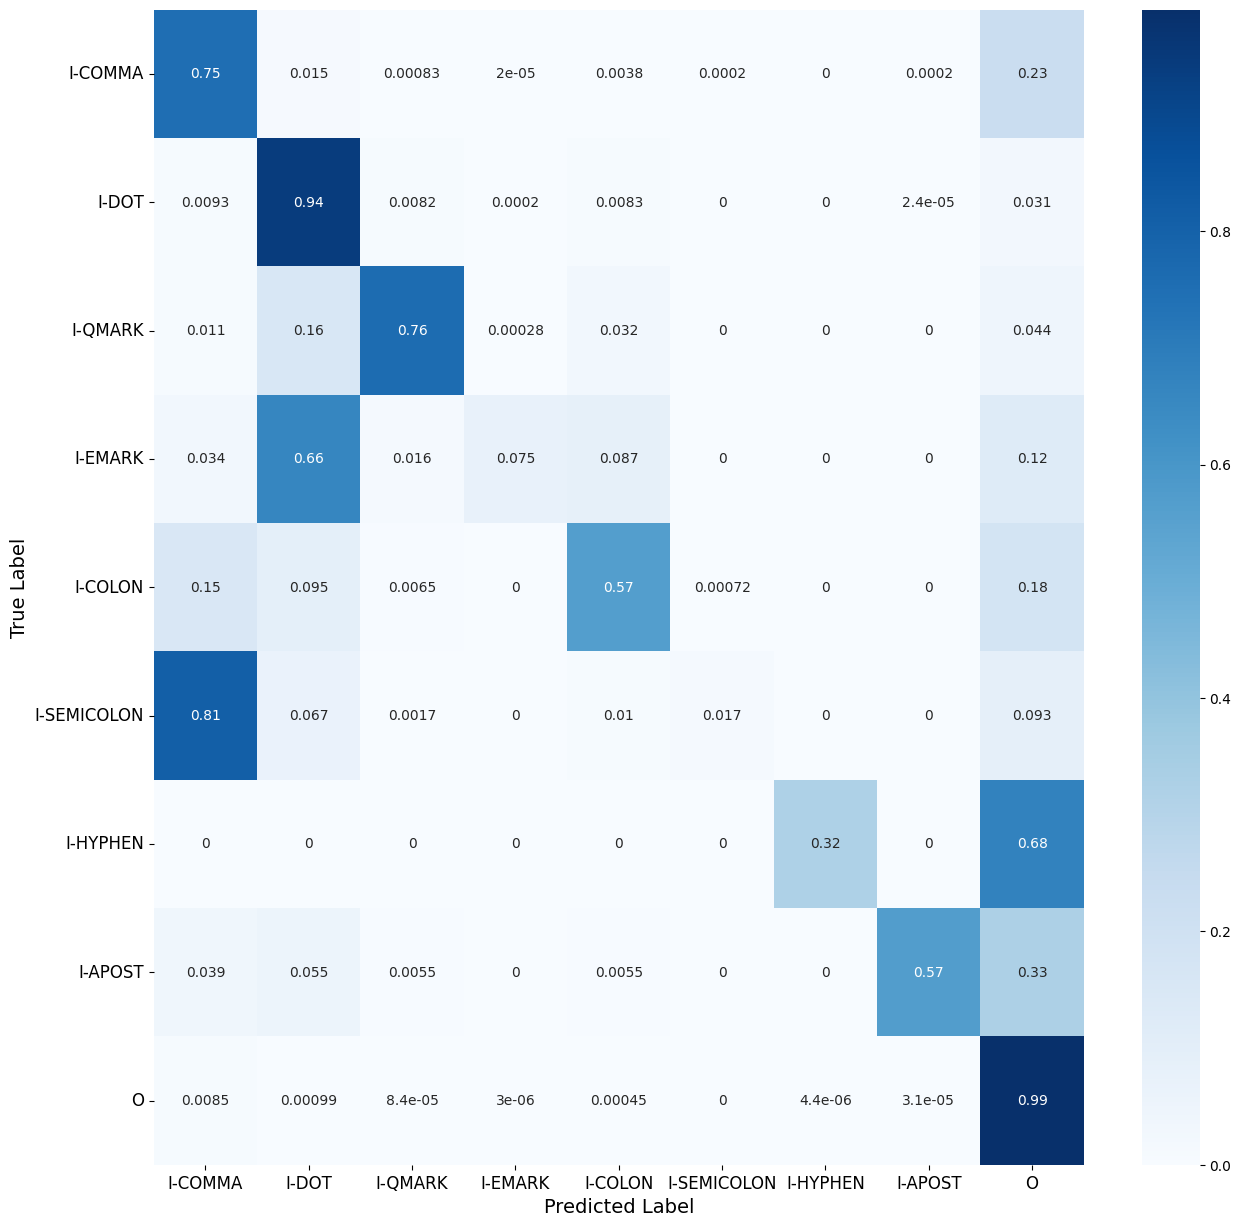

In [14]:
plot_labels = labels_set
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(nor_cm,
            ax=ax, 
            annot=True,
            cmap='Blues',
            xticklabels=plot_labels,
            yticklabels=plot_labels)
plt.yticks(rotation=0,size=12)
plt.xticks(size=12)
ax.set_xlabel('Predicted Label',size=14)
ax.set_ylabel('True Label',size=14)

>Testing on an example data

In [45]:
MY_TEST_TEXTS = ["In September 2010 , a teaser website was revealed by Sega , hinting at a new Valkyria Chronicles game . In its September issue , Famitsu listed that Senjō no Valkyria 3 would be arriving on the PlayStation Portable . Its first public appearance was at the 2010 Tokyo Game Show ( TGS ) , where a demo was made available for journalists and attendees . During the publicity , story details were kept scant so as not to spoil too much for potential players , along with some of its content still being in flux at the time of its reveal . To promote the game and detail the story leading into the game 's events , an episodic Flash visual novel written by Fujii began release in January 2011 . The game was released January 27 , 2011 .",
                 "Partly due to these events , and partly due to the major losses in manpower Gallia suffers towards the end of the war with the Empire , the Nameless are offered a formal position as a squad in the Gallian Army rather than serve as an anonymous shadow force . This is short @-@ lived , however , as following Maximilian 's defeat , Dahau and Calamity Raven move to activate an ancient <unk> super weapon within the Empire , kept secret by their benefactor . Without the support of Maximilian or the chance to prove themselves in the war with Gallia , it is Dahau 's last trump card in creating a new Darcsen nation . As an armed Gallian force invading the Empire just following the two nations ' cease @-@ fire would certainly wreck their newfound peace , Kurt decides to once again make his squad the Nameless , asking Crowe to list himself and all under his command as killed @-@ in @-@ action .", 
                ]

In [46]:
removed_punctuations = []
for txt in MY_TEST_TEXTS:
    txt2 = txt
    for pun in special_labels.keys():
        txt2 = txt2.replace(pun, "")
    removed_punctuations.append(txt2)

In [47]:
removed_punctuations

['In September 2010  a teaser website was revealed by Sega  hinting at a new Valkyria Chronicles game  In its September issue  Famitsu listed that Senjō no Valkyria 3 would be arriving on the PlayStation Portable  Its first public appearance was at the 2010 Tokyo Game Show ( TGS )  where a demo was made available for journalists and attendees  During the publicity  story details were kept scant so as not to spoil too much for potential players  along with some of its content still being in flux at the time of its reveal  To promote the game and detail the story leading into the game s events  an episodic Flash visual novel written by Fujii began release in January 2011  The game was released January 27  2011 ',
 'Partly due to these events  and partly due to the major losses in manpower Gallia suffers towards the end of the war with the Empire  the Nameless are offered a formal position as a squad in the Gallian Army rather than serve as an anonymous shadow force  This is short @@ live

In [48]:
result, _ = model.predict(removed_punctuations)

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
inv_special_labels = {v: k for k, v in special_labels.items()}
predicted_texts = []
for res in result:
    sentence = []
    for diction in res:
        sentence.append(list(diction.keys())[0])
        if list(diction.values())[0] in list(inv_special_labels.keys()):
            sentence.append(inv_special_labels[list(diction.values())[0]])
    predicted_texts.append(" ".join(sentence))

In [50]:
predicted_texts

['In September 2010 , a teaser website was revealed by Sega , hinting at a new Valkyria Chronicles game . In its September issue , Famitsu listed that Senjō , no Valkyria 3 would be arriving on the PlayStation Portable . Its first public appearance was at the 2010 Tokyo Game Show , ( TGS ) where a demo was made available for journalists and attendees . During the publicity story , details were kept scant so as not to spoil too much for potential players , along with some of its content still being in flux at the time of its reveal . To promote the game and detail the story leading into the game s events , an episodic Flash visual novel written by Fujii began release in January 2011 . The game',
 'Partly due to these events , and partly due to the major losses in manpower , Gallia suffers towards the end of the war with the Empire , the Nameless are offered a formal position as a squad in the Gallian Army rather than serve as an anonymous shadow force . This is short . @@ lived , howeve